In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = {
    'Cantons' : ['BE', 'TG', 'ZH', 'BS', 'BL', 'SG', 'TI', 'VD', 'GE', 'FR', 'VS', 'GR','AG', 'LU', 'SO', 'JU', 'GL', 'NE', 'ZG', 'UR', 'OW', 'AR', 'AI', 'NW', 'SZ', 'SH'],
    'mio CHF' : [19.5, 7.6, 6.9, 6.9, 6.6, 6.1, 6.1, 5.5, 5.1, 4.1, 3.7, 3.6, 3.5, 1.8, 1.2, 0.9, 0.8, 0.8, 0.7, 0.6, 0.4, 0.3, 0.1, 0.1, 0, 0],
    'EnergieEco (TWh)' : [1.3, 0.6, 0.7, 0.32, 0.25, 0.9, 0.25, 1.1, 0.20, 0.60, 0.28, 0.28, 0.26, 0.27, 0.125, 0.075, 0.125, 0.065, 0.01, 0.05, 0.065, 0,0,0,0,0],
    'CO2Eco (mio t. CO2)' : [0.24, 0.10, 0.11, 0.07, 0.05, 0.172, 0.04, 0.20, 0.04, 0.08, 0.06, 0.06, 0.06, 0.06, 0.025, 0.0125, 0.025, 0.015, 0.005, 0.008, 0.01,0,0,0,0,0 ]
}

In [18]:
df = pd.DataFrame(data)

In [20]:
df['kWh/CHF'] = df['EnergieEco (TWh)'] / df['mio CHF']
df['CO2/CHF'] = 1e3 * df['CO2Eco (mio t. CO2)'] / df['mio CHF']

In [26]:
df.fillna(0, inplace=True)
df

,CO2Eco (mio t. CO2),Cantons,EnergieEco (TWh),mio CHF,kWh/CHF,CO2/CHF
0,0.2400,BE,1.300,19.5,0.066667,12.307692
1,0.1000,TG,0.600,7.6,0.078947,13.157895
2,0.1100,ZH,0.700,6.9,0.101449,15.942029
3,0.0700,BS,0.320,6.9,0.046377,10.144928
4,0.0500,BL,0.250,6.6,0.037879,7.575758
5,0.1720,SG,0.900,6.1,0.147541,28.196721
6,0.0400,TI,0.250,6.1,0.040984,6.557377
7,0.2000,VD,1.100,5.5,0.200000,36.363636
8,0.0400,GE,0.200,5.1,0.039216,7.843137
9,0.0800,FR,0.600,4.1,0.146341,19.512195


<IPython.core.display.Javascript object>


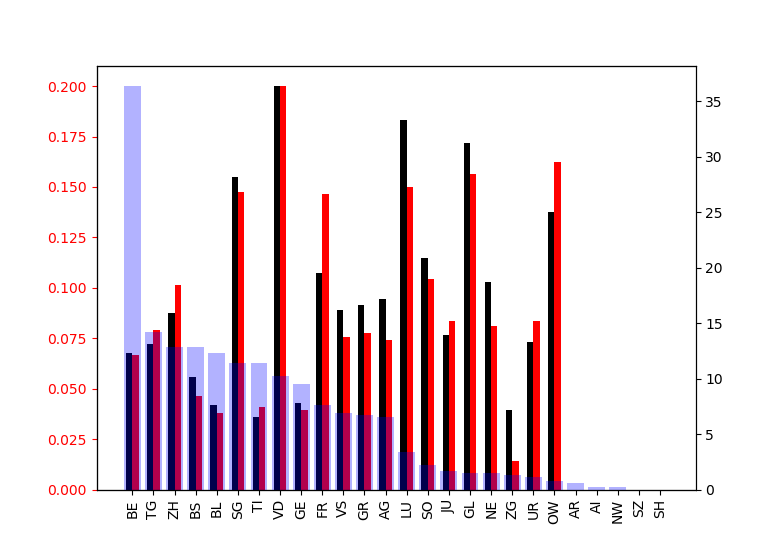

In [36]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(range(len(df['Cantons'])), df['kWh/CHF'], align='edge', width=0.3, color='red', label='kWh/CHF')
ax1.set_xticks(range(len(df['Cantons'])))
ax1.set_xticklabels(df['Cantons'], rotation='vertical')

ax2.bar(range(len(df['Cantons'])), df['CO2/CHF'], align='edge', width=-0.3, color='black', label='kg CO2/CHF')

ax3 = ax1.twinx()
ax3.bar(range(len(df['Cantons'])), df['mio CHF'], color='blue', label='mio CHF', alpha=0.3, width=0.8)
ax3.spines['right'].set_position(('outward', 60))

ax1.tick_params('y', colors='red')
ax2.tick_params('y', colors='black')